# Петров Максим 18-ИВТ-2
# Лабораторная работа №2. Вариант 26
# Набор данных: 4 (iris)
# Классификаторы:
# 2 – классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов);
# 4 логический классификатор (бинарное решающее дерево).

## 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import sklearn as skl
import warnings
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import Ridge
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import RadiusNeighborsClassifier

from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.svm import LinearSVC
from sklearn import datasets


In [12]:
iris = pd.read_csv('iris.data.csv')
iris

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


### 5.1 - Длина чашелистика
### 3.5 - Ширина чашелистика
### 1.4 - Длина лепестка
### 0.2 - Ширина лепестка
### Iris-setosa - Классы растений Ирис

## 2 - Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

In [13]:
print('До удаление дубликатов: %d' % len(iris))
iris.drop_duplicates(keep="first", inplace=True)
print('После удаление дубликатов: %d' % len(iris))

До удаление дубликатов: 149
После удаление дубликатов: 146


## 3 - Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

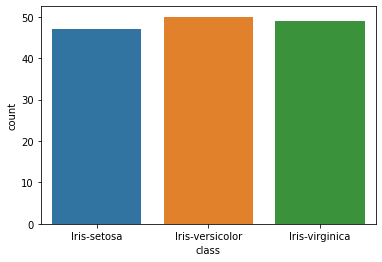

In [14]:
sns.barplot(data=pd.DataFrame({
'count': [
len(iris.loc[iris['Iris-setosa'] == 'Iris-setosa']),
len(iris.loc[iris['Iris-setosa'] == 'Iris-versicolor']),
len(iris.loc[iris['Iris-setosa'] == 'Iris-virginica']),
],
'class': [
'Iris-setosa',
'Iris-versicolor',
'Iris-virginica',
],
}), y='count', x='class')

### Из гистограммы видно, что все 3 класса - сбалансированны

## 4 - Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

numerical:  ['5.1', '3.5', '1.4', '0.2']
categor:  ['Iris-setosa']


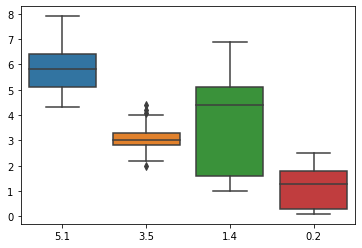

In [15]:
column = iris.columns
numer = [i for i in column if iris[i].dtype.name != 'object'
                                     and i != 'pclass' and i != 'survived']
categor = [i for i in column if iris[i].dtype.name == 'object' 
                                      or i == 'pclass' or i == 'survived']
print('numerical: ', numer)
print('categor: ', categor)

sns.boxplot(data = iris[numer])

,5.1,3.5,1.4,0.2,Iris-setosa
0,0.166667,0.416667,0.067797,0.041667,Iris-setosa
1,0.111111,0.500000,0.050847,0.041667,Iris-setosa
2,0.083333,0.458333,0.084746,0.041667,Iris-setosa
3,0.194444,0.666667,0.067797,0.041667,Iris-setosa
4,0.305556,0.791667,0.118644,0.125000,Iris-setosa
...,...,...,...,...,...
144,0.666667,0.416667,0.711864,0.916667,Iris-virginica
145,0.555556,0.208333,0.677966,0.750000,Iris-virginica
146,0.611111,0.416667,0.711864,0.791667,Iris-virginica
147,0.527778,0.583333,0.745763,0.916667,Iris-virginica


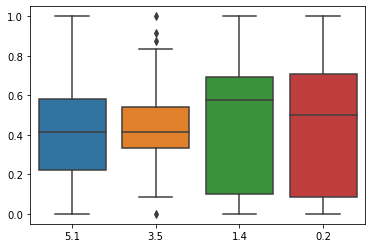

In [16]:
scaler = preprocessing.MinMaxScaler()

iris[numer] = scaler.fit_transform(iris[numer].values.astype(float))
sns.boxplot(data=iris[numer])

iris

## 5 - Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

In [17]:
def dummy(data, feature):
    for i in data[feature].unique():
        data[feature + ' = ' +  str(i)] = (data[feature] == i).astype(float)
        
dummy(iris, 'Iris-setosa')
iris.drop(['Iris-setosa'], axis='columns', inplace=True)
iris

,5.1,3.5,1.4,0.2,Iris-setosa = Iris-setosa,Iris-setosa = Iris-versicolor,Iris-setosa = Iris-virginica
0,0.166667,0.416667,0.067797,0.041667,1.0,0.0,0.0
1,0.111111,0.500000,0.050847,0.041667,1.0,0.0,0.0
2,0.083333,0.458333,0.084746,0.041667,1.0,0.0,0.0
3,0.194444,0.666667,0.067797,0.041667,1.0,0.0,0.0
4,0.305556,0.791667,0.118644,0.125000,1.0,0.0,0.0
...,...,...,...,...,...,...,...
144,0.666667,0.416667,0.711864,0.916667,0.0,0.0,1.0
145,0.555556,0.208333,0.677966,0.750000,0.0,0.0,1.0
146,0.611111,0.416667,0.711864,0.791667,0.0,0.0,1.0
147,0.527778,0.583333,0.745763,0.916667,0.0,0.0,1.0


## 6 - Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);

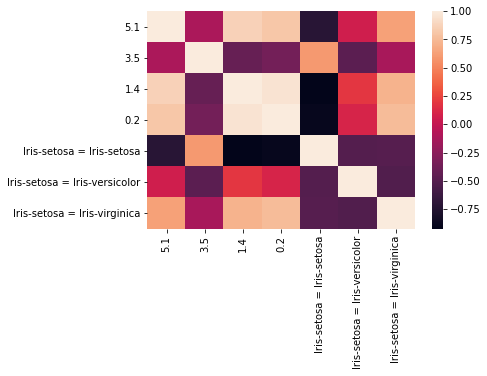

In [18]:
correl = iris.corr()
sns.heatmap(correl)

#### Корреляция происходит равномерно

## 7 - Заполните пропущенные значения в данных;

In [19]:
iris.count()

5.1                              146
3.5                              146
1.4                              146
0.2                              146
Iris-setosa = Iris-setosa        146
Iris-setosa = Iris-versicolor    146
Iris-setosa = Iris-virginica     146
dtype: int64

#### Пропущенные значения отсутствуют 

### 8 - Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 

In [20]:
X, y = iris.drop('Iris-setosa = Iris-versicolor', axis=1), iris['Iris-setosa = Iris-versicolor']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

#### 4 - логический классификатор (бинарное решающее дерево).

In [21]:
dtc = DecisionTreeClassifier()

params = {'max_depth': list(range(1,7)), 'max_features': list(range(1,7))}

dtc_grid = GridSearchCV(dtc, params)
dtc_grid.fit (X_train, y_train)

best_features = dtc_grid.best_estimator_.max_features
best_depth = dtc_grid.best_estimator_.max_depth
best_score = dtc_grid.best_score_
print('лучший тренировочный результат:', best_score, 
      '\t лучшее количество признаков:', best_features,
      '\t глубина:', best_depth)

dtc = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
dtc.fit(X_train, y_train)
best_score  = np.mean(y_test == dtc.predict(X_test))
print('лучший результат: ', best_score)

лучший тренировочный результат: 1.0 	 лучшее количество признаков: 6 	 глубина: 2
лучший результат:  1.0


#### 2 - классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов);

In [22]:
rnc = RadiusNeighborsClassifier()
params = {'radius': [2, 3, 4],
          'weights': ['uniform', 'distance']}


In [23]:
rnc_grid = GridSearchCV(rnc, params)
rnc_grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RadiusNeighborsClassifier(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None,
                                                 outlier_label=None, p=2,
                                                 radius=1.0,
                                                 weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'radius': [2, 3, 4],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [24]:
r = rnc_grid.best_estimator_.radius
rnc = RadiusNeighborsClassifier(radius=r)
rnc.fit(X_train, y_train)
y_score = rnc.predict(X_test)
print('Best: %.7f'%(rnc_grid.best_score_))

Best: 1.0000000


### 9 - Графики

In [25]:
y_test_inversion = [1-y for y in y_test]

rnc_proba = rnc.predict_proba(X_test)
dtc_proba = dtc.predict_proba(X_test)

### ROC - кривые

In [26]:
def addRoc1(prob, label, test):
    tpr, fpr, _ = roc_curve(test, prob[:, 0])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %f)' % (label, roc_auc))

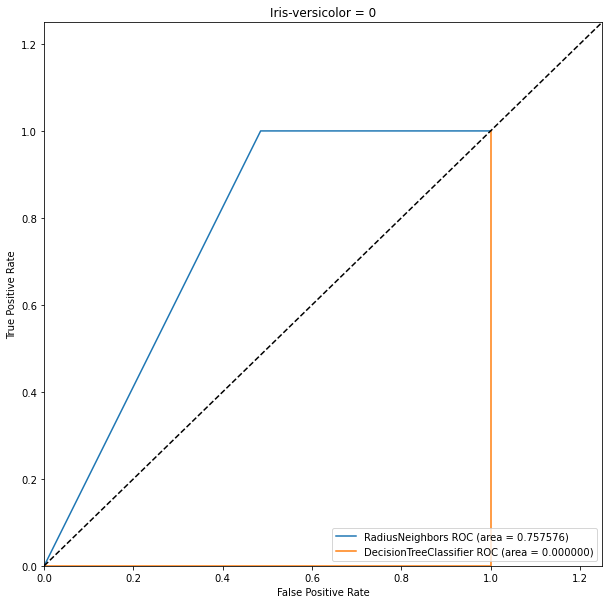

In [27]:
plt.figure(figsize=(10,10))

addRoc1(rnc_proba, 'RadiusNeighbors', y_test_inversion)
addRoc1(dtc_proba, 'DecisionTreeClassifier', y_test_inversion)

plt.plot([0, 1.25], [0, 1.25], 'k--')
plt.xlim([0.0, 1.25])
plt.ylim([0.0, 1.25])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('Iris-versicolor = 0')
plt.show()

In [28]:
def addRoc2(prob, label, test):
    fpr, tpr, _ = roc_curve(test, prob[:, 1])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %f)' % (label, roc_auc))

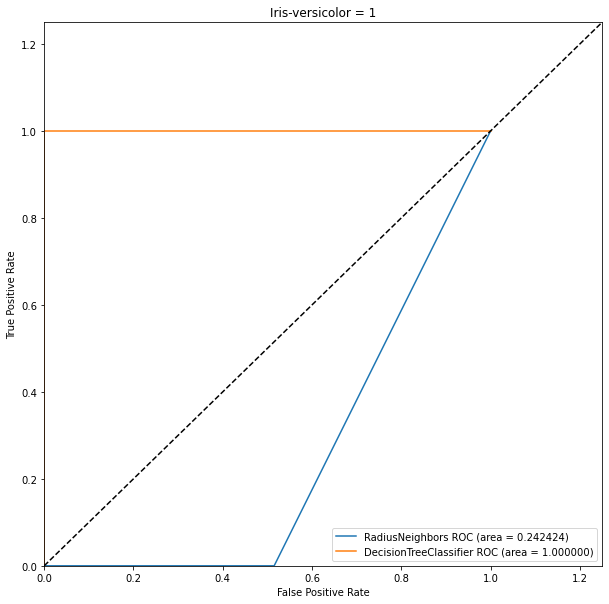

In [29]:
plt.figure(figsize=(10,10))

addRoc2(rnc_proba, 'RadiusNeighbors', y_test)
addRoc2(dtc_proba, 'DecisionTreeClassifier', y_test)

plt.plot([0, 1.25], [0, 1.25], 'k--')
plt.xlim([0.0, 1.25])
plt.ylim([0.0, 1.25])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('Iris-versicolor = 1')
plt.show()

### PR - кривые

In [30]:
def addPr(prob, occupancy, label, test):
    precision, recall, _ = precision_recall_curve(test, prob[:, occupancy])
    aps = average_precision_score(test, prob[:, occupancy])
    plt.plot(recall, precision, label='%s PR (area = %f)' % (label, aps))

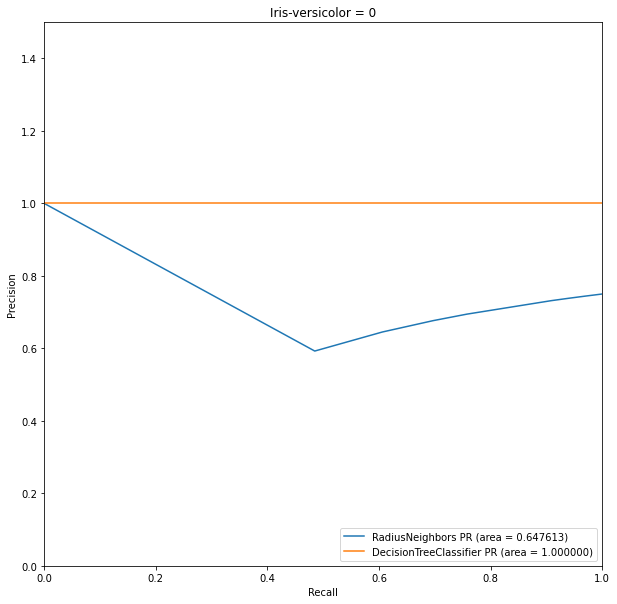

In [31]:
plt.figure(figsize=(10,10))

addPr(rnc_proba, 0, 'RadiusNeighbors', y_test_inversion)
addPr(dtc_proba, 0, 'DecisionTreeClassifier', y_test_inversion)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.5])
plt.title('Iris-versicolor = 0')
plt.legend(loc=4, fontsize='medium')
plt.show()

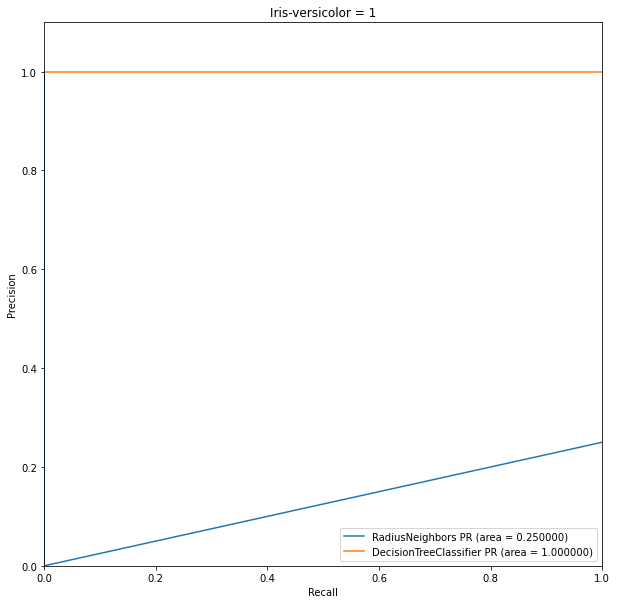

In [32]:
plt.figure(figsize=(10,10))

addPr(rnc_proba, 1, 'RadiusNeighbors', y_test)
addPr(dtc_proba, 1, 'DecisionTreeClassifier', y_test)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.title('Iris-versicolor = 1')
plt.legend(loc=4, fontsize='medium')
plt.show()